In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10, 10) # set default figure size, 8in by 6in

This week, we will be covering anomaly detection which is widely used in fraud detection (e.g. ‘has this credit card been stolen?’). Given a large number of data points, we may sometimes want to figure out which ones vary significantly from the average. For example, in manufacturing, we may want to detect defects or anomalies. We show how a dataset can be modeled using a Gaussian distribution, and how the model can be used for anomaly detection.

# Video W9 01: Problem Motivation (Anomaly Detection)

[YouTube Video Link](https://www.youtube.com/watch?v=hhI-PdMO1sk&list=PLZ9qNFMHZ-A4rycgrgOYma6zxF4BZGGPW&index=89)


# Video W9 02: Gaussian Distribution

[YouTube Video Link](https://www.youtube.com/watch?v=2yosK5CJZmo&index=90&list=PLZ9qNFMHZ-A4rycgrgOYma6zxF4BZGGPW)

## Parameter Estimation ##

The parameter estimation problem is basically, given a set of data that you suspect may be distributed according to a
Gaussian distribution, how do you determine the values of the mean $\mu$ and the standard deviation $\sigma$ that best
fit or explain the data you have been given.  We can use a simple maximum likelihood estimate to determine which values
for the $\mu, \sigma$ parameters fit the data.  To estimate $\mu$, simply calculate the mean of the data points
you have been given:

$$
\mu = \frac{1}{m} \sum_{i=1}^{m} x^{(i)}
$$

Likewise, to estimate the variance $\sigma^2$, sum up the squares of each data point subtracted from your estimated
mean value:

$$
\sigma^2 = \frac{1}{m} \sum_{i=1}^{m} (x^{(i)} - \mu)^2
$$

Just to show that is approximately works, and to generate a set of data and figure similar to the one from our
companion video, lets create a set of 20 points drawn from a normal distribution with a mean of 1.5 and
a standard deviation of 0.75 using python:

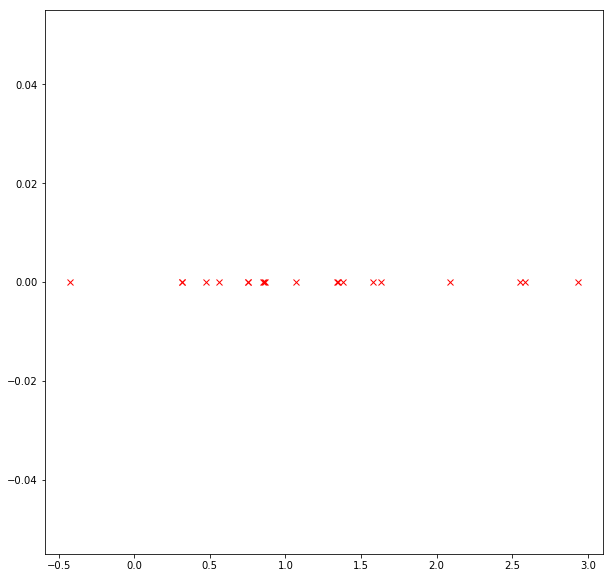

In [2]:
m = 20 # number of data points
mu_actual = 1.5 # the actual mean we will use to generate some example data points
sigma_actual = 0.75 # the actual standard deviation we will use to generate random data points

x = np.random.normal(loc=mu_actual, scale=sigma_actual, size = (m,))
plt.plot(x, np.zeros( (m,)), 'rx')

Remember that the actual mean and standard deviation we used for the points are 1.5 and 0.75 respectively.  We can get
mean likelihood estimates of the values for our randomly generated data like this:

In [3]:
mu_estimate = np.sum(x) / m
variance_estimate = np.sum( (x - mu_estimate)**2.0 ) / m
sigma_estimate = np.sqrt(variance_estimate)
print(mu_estimate, sigma_estimate, variance_estimate)

1.19150589735 0.832190175953 0.692540488952


# Video W9 03: Anomaly Detection Algorithm

[YouTube Video Link](https://www.youtube.com/watch?v=egIWLtZjHoo&list=PLZ9qNFMHZ-A4rycgrgOYma6zxF4BZGGPW&index=91)

## Density Estimation ##

One way to estimate the probability of a given observation being an anomaly or not is to make an independence assumption on
each of the $n$ features, and calculate the probability of getting each feature given our observed data.  To do this, we
use the previous method and assume that each of our features is normally distributed, and use a maximum likelihood estimate
to determine the mean and variance parameters for each of our features independently.  Given these estimations, we can use them
to calculate the probability of each observed feature, and multiplying all of these probabilities together (which works
because of the assumption of independence) gives us an overall estimate of the probability of seeing the new observation.

The final probability (or density) estimate can be stated compactly using the product formula

$$
\prod_{j=1}^n p(x_j; \mu_j, \sigma_j^2) = p(x_1; \mu_1, \sigma_1^2) \times p(x_2; \mu_2, \sigma_2^2) \times \ldots \times p(x_n; \mu_n, \sigma_n^2)
$$

Where for each of our $n$ features, we have determined the maximum likelihood $\mu_j, \sigma_j^2$ mean and variance
parameters.  The $\prod$ symbol simply means we are multiplying each of the $n$ probabilities together.

## Anomaly Detection Algorithm ##

Putting these previous concepts together, we can build an anomaly detection system using the following algorithm:

1. Choose features $x_i$ that you think might be indicative of anomalous examples.
2. Fit parameters $\mu_1, \ldots, \mu_n, \sigma_1^2, \ldots, \sigma_n^2$
$$
\mu_j = \frac{1}{m} \sum_{i=1}^{m} x_j^{(i)} \\
\sigma_j^2 = \frac{1}{m} \sum_{i=1}^{m} (x_j^{(i)} - \mu_j)^2 
$$
3. Given a new example $x$, compute $p(x)$:
$$
p(x) = \prod_{j=1}^n p(x_j; \mu_j, \sigma_j^2) = \prod_{j=1}^{n} \frac{1}{\sqrt{2 \pi} \sigma_j} \textrm{exp}(- \frac{(x_j - \mu_j)^2}{2 \sigma_j^2})
$$

And finally, we will determine a new observation is an anomaly if the probability is below some threshold, 
e.g. if $p(x) < \epsilon$.

Lets give an example in Python similar to the one shown in our video.  Lets again generate a set of data, but with
2 dimensions or features in this case.  As shown in the video, the mean and standard deviation we will use for our two
features will be:
$$
\mu_1 = 5, \sigma_1 = 2\\
\mu_2 = 3, \sigma_2 = 1
$$

Here we will show vectorized versions of computing the maximum likelihood estimates and probabilities:

In [4]:
m, n = 20, 2 # number of example data points ; number of features/dimensions
mu_actual = np.array([5.0, 3.0])
sigma_actual = np.array([2.0, 1.0])

# we will generate a mxn array of values with mean 0 and std 1.0
x = np.random.normal(loc=0.0, scale=1.0, size=(m, n))

# and we will scale each dimension to have the desired mean/std.
x[:,0] = (x[:,0] * sigma_actual[0]) + mu_actual[0]
x[:,1] = (x[:,1] * sigma_actual[1]) + mu_actual[1]

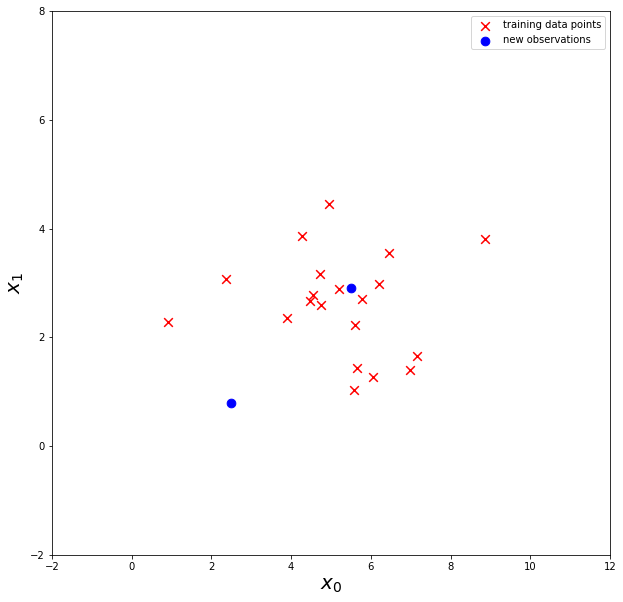

In [5]:
# display our randomly generated set of 20 data points in
# our 2 dimensional feature space
#plt.plot(x[:,0], x[:,1], 'rx', markersize=10, markeredgewidth=3, label='training data points')
plt.scatter(x[:,0], x[:,1], c='r', marker='x', s=75, label='training data points')
plt.xlabel('$x_0$', fontsize=20)
plt.ylabel('$x_1$', fontsize=20)
plt.axis([-2, 12, -2, 8])

# display location of 2 new observations we will use to demonstrate
# calculating the density or probability estimate
x_new = np.array([[5.5, 2.9],
                  [2.5, 0.8]])
#plt.plot(x_new[:,0], x_new[:,1], 'bo', markersize=10, markeredgewidth=3, label='new observations')
plt.scatter(x_new[:,0], x_new[:,1], c='b', marker='o', s=75, label='new observations')
plt.legend()

In [6]:
# define a function that compute the probability/density of an observation
def probability_density_function(x, mu, sigma):
    """Calculate the probability of the given observation x for a normal distribution with mean mu and
    standard deviation sigma.  These are known as computing the probability density function, or pdf.
    This is equivalent to the scipy libraries stats.norm.pdf() function.
    """
    return (1.0 / (np.sqrt(2.0 * np.pi) * sigma) ) * np.exp(- (x - mu)**2.0 / (2.0 * sigma**2.0) )

In [7]:
# calculate the maximum likelihood mean and variance for each dimension
print( "The maximum likelihood mean and variance for our 2 dimensions:" )
print( np.mean(x, axis=0) )
print( np.std(x, axis=0) )
mu_estimate = np.mean(x, axis=0)
sigma_estimate = np.std(x, axis=0)

# calculate the density or probability estimate for the new observations
# first an example of the probability calculation for the point 0, for dimension 0 and 1
print( "" )
print( "A new observation that is not analomous:", x_new[0,:] )
p_0 = probability_density_function(x_new[0, 0], mu_estimate[0], sigma_estimate[0])
print( "Probability for dimension 0:", p_0 )
p_1 = probability_density_function(x_new[0, 1], mu_estimate[1], sigma_estimate[1])
print( "Probability for dimension 1:", p_1 )
print( "Product of independent probabilities:", p_0 * p_1 )

# now the same calculation for our anamolous point 1
print( "" )
print( "A new observation that IS analomous:", x_new[1,:] )
p_0 = probability_density_function(x_new[1, 0], mu_estimate[0], sigma_estimate[0])
print( "Probability for dimension 0:", p_0 )
p_1 = probability_density_function(x_new[1, 1], mu_estimate[1], sigma_estimate[1])
print( "Probability for dimension 1:", p_1 )
print( "Product of independent probabilities:", p_0 * p_1 )


The maximum likelihood mean and variance for our 2 dimensions:
[ 5.22306894  2.60734437]
[ 1.65725292  0.9041907 ]

A new observation that is not analomous: [ 5.5  2.9]
Probability for dimension 0: 0.237387484469
Probability for dimension 1: 0.418698860437
Product of independent probabilities: 0.0993938692293

A new observation that IS analomous: [ 2.5  0.8]
Probability for dimension 0: 0.0624102935234
Probability for dimension 1: 0.0598490110473
Product of independent probabilities: 0.00373519434655


In [8]:
# we can get the exam same results using the pdf function from scipy, which we should normally do rather
# than implementing the function by hand as I have done above
import scipy.stats
print("")
print("A new observation that is not analomous:", x_new[0,:])
p_0 = scipy.stats.norm.pdf(x_new[0, 0], loc=mu_estimate[0], scale=sigma_estimate[0])
print("Probability for dimension 0:", p_0)
p_1 = scipy.stats.norm.pdf(x_new[0, 1], loc=mu_estimate[1], scale=sigma_estimate[1])
print("Probability for dimension 1:", p_1)
print("Product of independent probabilities:", p_0 * p_1)

# now the same calculation for our anamolous point 1
print("")
print("A new observation that IS analomous:", x_new[1,:])
p_0 = scipy.stats.norm.pdf(x_new[1, 0], loc=mu_estimate[0], scale=sigma_estimate[0])
print("Probability for dimension 0:", p_0)
p_1 = scipy.stats.norm.pdf(x_new[1, 1], loc=mu_estimate[1], scale=sigma_estimate[1])
print("Probability for dimension 1:", p_1)
print("Product of independent probabilities:", p_0 * p_1)



A new observation that is not analomous: [ 5.5  2.9]
Probability for dimension 0: 0.237387484469
Probability for dimension 1: 0.418698860437
Product of independent probabilities: 0.0993938692293

A new observation that IS analomous: [ 2.5  0.8]
Probability for dimension 0: 0.0624102935234
Probability for dimension 1: 0.0598490110473
Product of independent probabilities: 0.00373519434655


In [9]:
# or to vectorize the above
print("probabilities of all points for each dimension:")
p = scipy.stats.norm.pdf(x_new, loc=mu_estimate, scale=sigma_estimate)
print(p)

print("")
print("The computed product of the probabilites for our points:")
p = np.prod(p, axis=1)
print(p)

probabilities of all points for each dimension:
[[ 0.23738748  0.41869886]
 [ 0.06241029  0.05984901]]

The computed product of the probabilites for our points:
[ 0.09939387  0.00373519]


In [10]:
# and finally, we can select an epsilon threshold, and determine which points are anomalous and which not
# using the given threshold
epsilon = 0.005
print(p < epsilon)

[False  True]


The above cells showed how we can compute the anomaly detection algoritm.  Lets visualize what an epsilon value of 0.01 means
for our given set of 20 data points.  Here we will plot what is essentially the decision boundary for our given set of
data, above which the threshold will determine points are "anamolous"

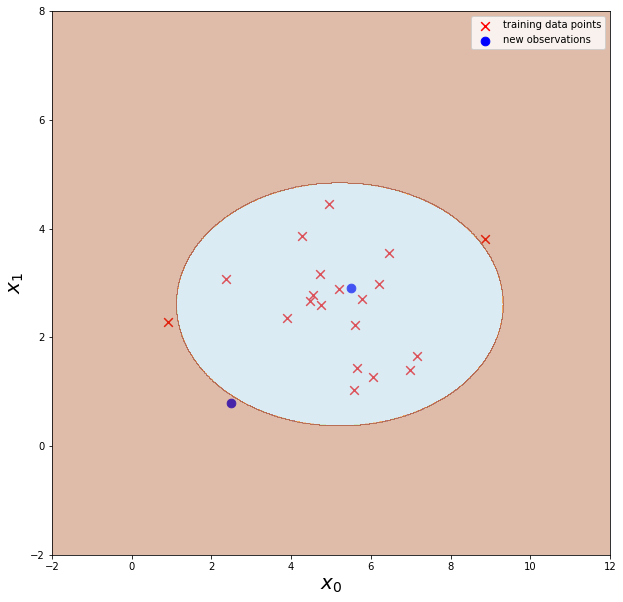

In [11]:
# display our randomly generated set of 20 data points in
# our 2 dimensional feature space
#plt.plot(x[:,0], x[:,1], 'rx', markersize=10, markeredgewidth=3, label='training data points')
plt.scatter(x[:,0], x[:,1], c='r', marker='x', s=75, label='training data points')
plt.xlabel('$x_0$', fontsize=20)
plt.ylabel('$x_1$', fontsize=20)
plt.axis([-2, 12, -2, 8])

# display location of 2 new observations we will use to demonstrate
# calculating the density or probability estimate
x_new = np.array([[5.5, 2.9],
                  [2.5, 0.8]])
#plt.plot(x_new[:,0], x_new[:,1], 'bo', markersize=10, markeredgewidth=3, label='new observations')
plt.scatter(x_new[:,0], x_new[:,1], c='b', marker='o', s=75, label='new observations')
plt.legend()


# and create a mesh to detect decision boundary for a given epsilon and plot it
epsilon = 0.005
x_min, x_max = -2.0, 12.0
y_min, y_max = -2.0, 8.0
h = .01  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

gridpoints = np.c_[xx.ravel(), yy.ravel()]
p = scipy.stats.norm.pdf(gridpoints, loc=mu_estimate, scale=sigma_estimate)
p = (np.prod(p, axis=1) < epsilon) * 1.0
Z = p.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.4)


# Video W9 04: Developing and Evaluating an Anomaly Detection System

[YouTube Video Link](https://www.youtube.com/watch?v=20dfmwVwK-8&list=PLZ9qNFMHZ-A4rycgrgOYma6zxF4BZGGPW&index=92)


# Video W9 05: Anomaly Detection vs. Supervised Learning

[YouTube Video Link](https://www.youtube.com/watch?v=mGXtKNHLRMg&index=93&list=PLZ9qNFMHZ-A4rycgrgOYma6zxF4BZGGPW)


# Video W9 06: Choosing what Features to Use

[YouTube Video Link](https://www.youtube.com/watch?v=YrCQ0uRcNCk&list=PLZ9qNFMHZ-A4rycgrgOYma6zxF4BZGGPW&index=94)


# Video W9 07: Multivariate Gaussian Distribution

[YouTube Video Link](https://www.youtube.com/watch?v=fr5wML3y1Xk&list=PLZ9qNFMHZ-A4rycgrgOYma6zxF4BZGGPW&index=95)


# Video W9 08: Anomaly Detection using Multivariate Gaussian Distribution

[YouTube Video Link](https://www.youtube.com/watch?v=EobKYbaJAHM&list=PLZ9qNFMHZ-A4rycgrgOYma6zxF4BZGGPW&index=96)
